In [1]:
#### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import itertools
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import random
import os,shutil

src_path="../input"

print(os.listdir(src_path))

#constant value
VALID_SPIT=0.2
IMAGE_SIZE=80
BATCH_SIZE=20

['test1', 'sampleSubmission.csv', 'train']


In [3]:
label=[]
data=[]
counter=0
path="../input/train/train"
for file in os.listdir(path):
    image_data=cv2.imread(os.path.join(path,file), cv2.IMREAD_COLOR)
    image_data=cv2.resize(image_data,(IMAGE_SIZE,IMAGE_SIZE))
    if file.startswith("cat"):
        label.append(0)
    elif file.startswith("dog"):
        label.append(1)
    try:
        data.append(image_data/255)
    except:
        label=label[:len(label)-1]
    counter+=1
    if counter%1000==0:
        print (counter," image data retreived")

data=np.array(data)
data=data.reshape((data.shape)[0],(data.shape)[1],(data.shape)[2],3)
label=np.array(label)
print (data.shape)
print (label.shape)


1000  image data retreived
2000  image data retreived
3000  image data retreived
4000  image data retreived
5000  image data retreived
6000  image data retreived
7000  image data retreived
8000  image data retreived
9000  image data retreived
10000  image data retreived
11000  image data retreived
12000  image data retreived
13000  image data retreived
14000  image data retreived
15000  image data retreived
16000  image data retreived
17000  image data retreived
18000  image data retreived
19000  image data retreived
20000  image data retreived
21000  image data retreived
22000  image data retreived
23000  image data retreived
24000  image data retreived
25000  image data retreived
(25000, 80, 80, 3)
(25000,)


In [4]:
from sklearn.model_selection import train_test_split
train_data, valid_data, train_label, valid_label = train_test_split(
    data, label, test_size=0.2, random_state=42)
print(train_data.shape)
print(train_label.shape)
print(valid_data.shape)
print(valid_label.shape)


(20000, 80, 80, 3)
(20000,)
(5000, 80, 80, 3)
(5000,)


In [6]:
from keras import applications
vgg_model = applications.VGG16(weights='imagenet',
                               include_top=False,
                               pooling='avg',
                               input_shape=(80, 80, 3))

vgg_model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 2s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 80, 80, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 80, 80, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 80, 80, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 40, 40, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 40, 40, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 40, 40, 128)       147584    
_____

In [8]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(vgg_model)
model.add(layers.Dense(256, activation  = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 14,846,273
Trainable params: 14,846,273
Non-trainable params: 0
_________________________________________________________________


In [10]:
from keras import backend as K
K.set_image_dim_ordering('th')
K.set_image_data_format('channels_last')
from keras import layers
from keras import models
from keras import optimizers
from keras.layers import GlobalAveragePooling2D

model.compile(loss='binary_crossentropy',optimizer=optimizers.adam(lr=1e-4),metrics=['acc'])


In [13]:
train_history=model.fit(train_data, train_label,validation_data=(valid_data,valid_label),epochs=20, batch_size=BATCH_SIZE)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 44s 2ms/step - loss: 0.0956 - acc: 0.9621 - val_loss: 0.1280 - val_acc: 0.9484
Epoch 2/20
20000/20000 [==============================] - 44s 2ms/step - loss: 0.0718 - acc: 0.9713 - val_loss: 0.1719 - val_acc: 0.9380
Epoch 3/20
20000/20000 [==============================] - 44s 2ms/step - loss: 0.0493 - acc: 0.9823 - val_loss: 0.1614 - val_acc: 0.9378
Epoch 4/20
20000/20000 [==============================] - 44s 2ms/step - loss: 0.0378 - acc: 0.9860 - val_loss: 0.1379 - val_acc: 0.9544
Epoch 5/20
20000/20000 [==============================] - 44s 2ms/step - loss: 0.0316 - acc: 0.9888 - val_loss: 0.1594 - val_acc: 0.9548
Epoch 6/20
20000/20000 [==============================] - 44s 2ms/step - loss: 0.0334 - acc: 0.9884 - val_loss: 0.2819 - val_acc: 0.9304
Epoch 7/20
20000/20000 [==============================] - 44s 2ms/step - loss: 0.0233 - acc: 0.9923 - val_loss: 0.1780 - val_acc:

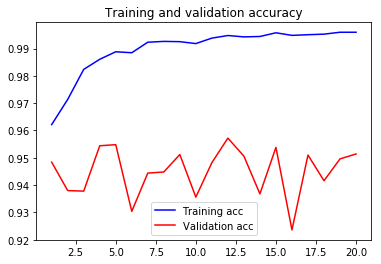

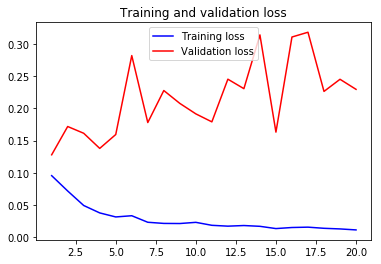

In [15]:
import matplotlib.pyplot as plt
acc = train_history.history['acc']
val_acc = train_history.history['val_acc']
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'blue', label='Training acc')
plt.plot(epochs, val_acc, 'red', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [16]:
from keras import Sequential
from keras.layers import *
import keras.optimizers as optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import *
import keras.backend as K
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory("../input/test1",target_size=(80, 80),batch_size=32,class_mode='binary')

Found 12500 images belonging to 1 classes.


In [17]:
from tensorflow.python.keras.models import Sequential
from keras.models import load_model

print("-- Evaluate --")

scores = model.evaluate_generator(
            test_generator, 
            steps = 100)


-- Evaluate --


In [18]:
Y_pred = model.predict(valid_data)
predicted_label=np.round(Y_pred,decimals=2)

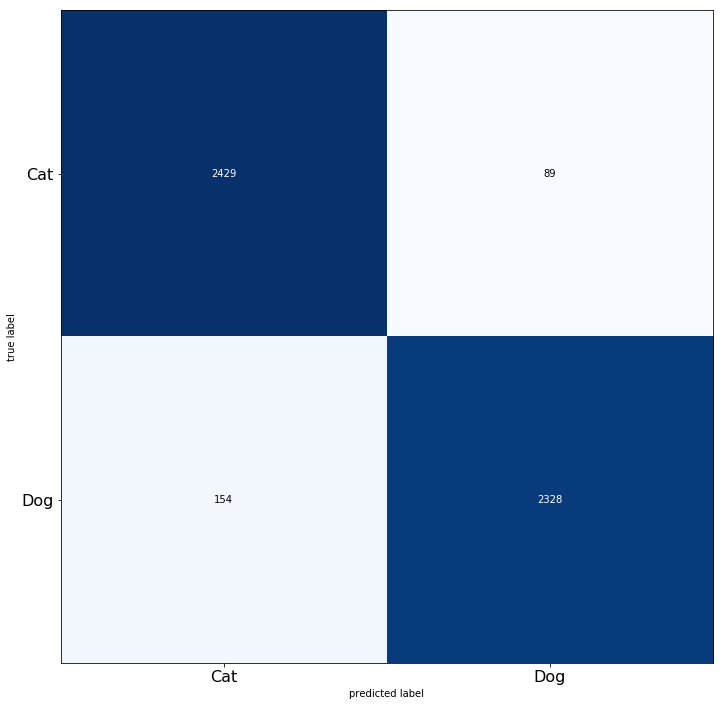

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.plotting import plot_confusion_matrix

# Get the confusion matrix

CM = confusion_matrix(valid_label, Y_pred.round())
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(12, 12))
plt.xticks(range(2), ['Cat', 'Dog'], fontsize=16)
plt.yticks(range(2), ['Cat', 'Dog'], fontsize=16)
plt.show()